In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_05.csv")

In [3]:
# data cleaning and indexing
drop = ["zip_code", "latitude", "longitude"]
df.drop(drop, axis=1, inplace=True)
df.occurred_date = df.occurred_date.astype("datetime64")
df.set_index(["occurred_date"], inplace=True)
df.sort_index(inplace=True)

# examining the new dataframe
display(df.shape)
display(df.head())
display(df.tail())

(56980, 14)

highest_offense_description family_violence  \
occurred_date                                               
2003-01-01            BURGLARY OF VEHICLE               N   
2003-01-01          BURGLARY OF RESIDENCE               N   
2003-01-01             TERRORISTIC THREAT               N   
2003-01-01                          THEFT               N   
2003-01-01            PUBLIC INTOXICATION               N   

                  report_date_time                 location_type  \
occurred_date                                                      
2003-01-01     2003-01-02 14:54:00         PARKING LOTS / GARAGE   
2003-01-01     2003-01-01 05:16:00              RESIDENCE / HOME   
2003-01-01     2003-01-01 22:00:00              RESIDENCE / HOME   
2003-01-01     2003-01-01 03:54:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01     2003-01-01 16:16:00         PARKING LOTS / GARAGE   

                                 address  council_district apd_sector  \
occurred_date                                                           
2003-01-01                  2900 COLE ST               9.0         BA   
2003-01-01                 202 E 34TH ST               9.0         BA   
2003-01-01              2307 LONGVIEW ST               9.0         BA   
2003-01-01                   608 PARK PL               9.0         BA   
2003-01-01     2200 BLOCK SAN ANTONIO ST               9.0         BA   

              apd_district clearance_status       clearance_date  year  month  \
occurred_date                                                                   
2003-01-01               1                N                  NaN  2003      1   
2003-01-01               1                N                  NaN  2003      1   
2003-01-01               2                O  2003-01-07 00:00:00  2003      1   
2003-01-01               1                N                  NaN  2003      1   
2003-01-01               1                C  2003-01-01 00:00:00  2003      1   

               week  day  
occurred_date             
2003-01-01        1    1  
2003-01-01        1    1  
2003-01-01        1    1  
2003-01-01        1    1  
2003-01-01        1    1

highest_offense_description family_violence  \
occurred_date                                               
2020-12-23                     MAIL THEFT               N   
2020-12-24      THEFT CATALYTIC CONVERTER               N   
2020-12-24                     MAIL THEFT               N   
2020-12-25               THEFT OF BICYCLE               N   
2020-12-25                 DEADLY CONDUCT               N   

                  report_date_time                 location_type  \
occurred_date                                                      
2020-12-23     2020-12-23 14:59:00              RESIDENCE / HOME   
2020-12-24     2020-12-24 10:56:00  STREETS / HWY / ROAD / ALLEY   
2020-12-24     2020-12-25 00:02:00              RESIDENCE / HOME   
2020-12-25     2020-12-25 19:55:00              RESIDENCE / HOME   
2020-12-25     2020-12-25 00:13:00              RESIDENCE / HOME   

                         address  council_district apd_sector apd_district  \
occurred_date                                                                
2020-12-23         403 W 38TH ST               9.0         BA            1   
2020-12-24         109 W 38TH ST               9.0         BA            1   
2020-12-24         1917 DAVID ST               9.0         BA            2   
2020-12-25     2800 SAN PEDRO ST               9.0         BA            3   
2020-12-25     3016 GUADALUPE ST               9.0         BA            3   

              clearance_status clearance_date  year  month  week  day  
occurred_date                                                          
2020-12-23                 NaN            NaN  2020     12    52   23  
2020-12-24                 NaN            NaN  2020     12    52   24  
2020-12-24                 NaN            NaN  2020     12    52   24  
2020-12-25                 NaN            NaN  2020     12    52   25  
2020-12-25                 NaN            NaN  2020     12    52   25

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')

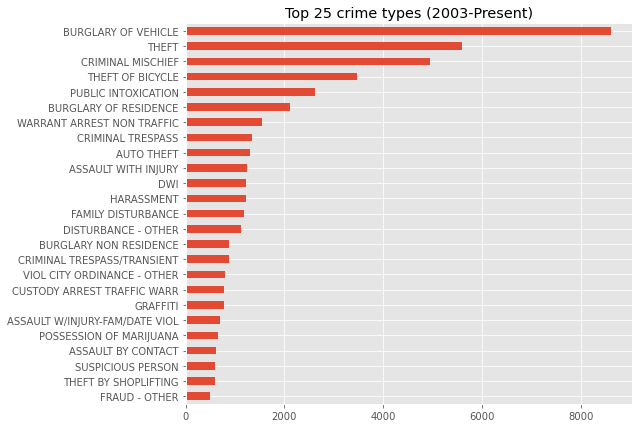

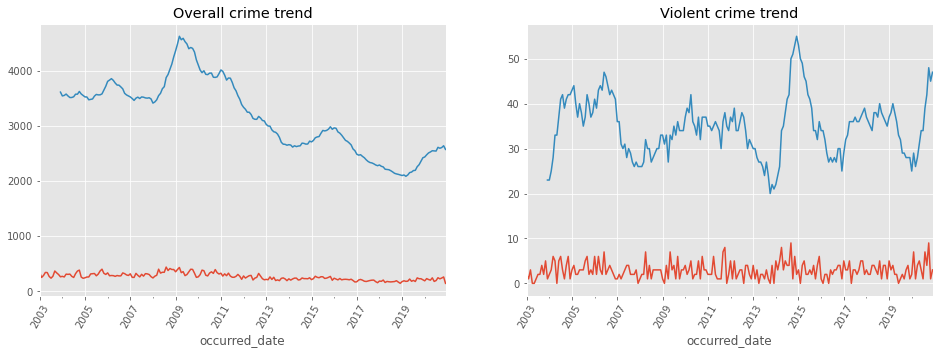

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    title="Top 25 crime types (2003-Present)", figsize=(8, 7)
)
plt.show()

# Visualizing trends (overall, violent, and murder)
fig, axs = plt.subplots(ncols=2, figsize=(16, 5))
df.resample("M").size().plot(ax=axs[0])
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend", rot=60, ax=axs[0]
)
df_viol.resample("M").size().plot(ax=axs[1])
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend", rot=60, ax=axs[1]
)
plt.show()

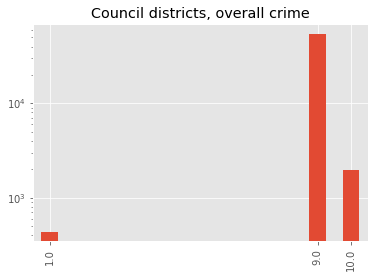

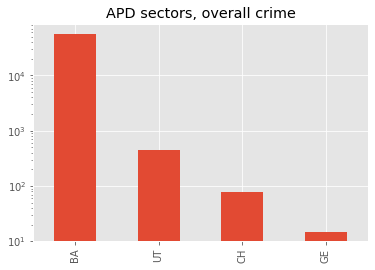

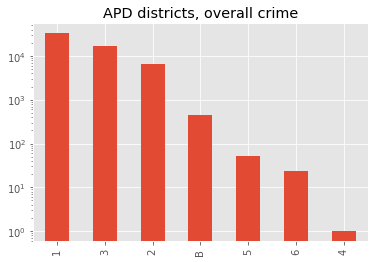

In [6]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

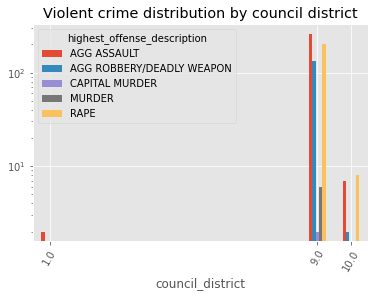

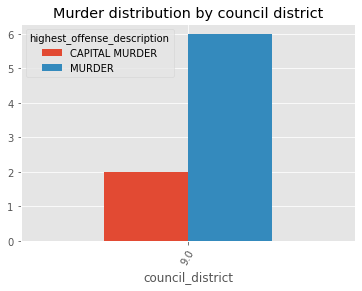

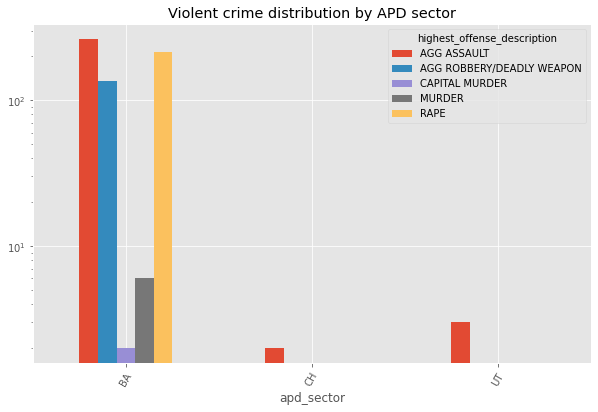

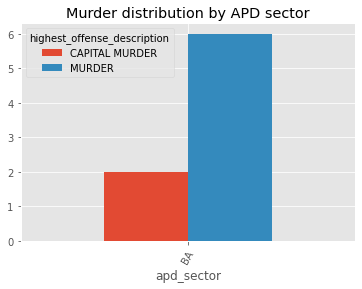

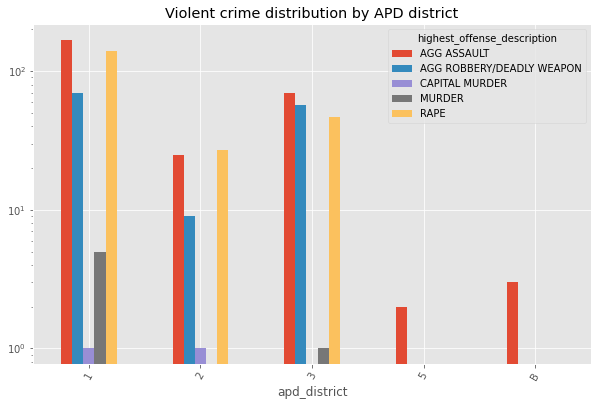

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


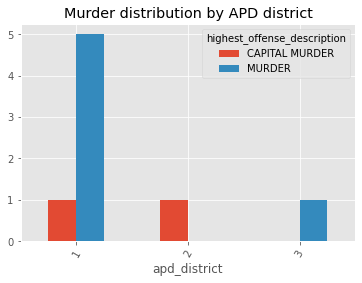

In [12]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    rot=60,
    # figsize=(10, 6.25),
    title="Violent crime distribution by council district",
    logy=True,
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    rot=60,
    figsize=(10, 6.25),
    logy=True,
    title="Violent crime distribution by APD sector",
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    rot=60,
    figsize=(10, 6.25),
    logy=True,
    title="Violent crime distribution by APD district",
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             1   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                          6   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      3   
COMMERCIAL / OFFICE BUILDING                              4   
CONSTRUCTION SITE                                         3   
CONVENIENCE STORE                                         4   
DEPARTMENT / DISCOUNT STORE                               1   
DRUG STORE / DR. OFFICE / HOSPITAL                        9   
FIELD / WOODS                                             2   
GAS / SERVICE STATIONS                                    2   
GOVERNMENT / PUBLIC BUILDING                              1   
HOTEL / MOTEL / ETC.                                      1   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          12   
PARK / PLAYGROUND                                         2   
PARKING LOTS / GARAGE                                    19   
RESIDENCE / HOME                                         66   
RESTAURANTS                                               7   
SCHOOL - COLLEGE / UNIVERSITY                             0   
SPECIALTY  STORE (TV  FUR ETC.)                           1   
STREETS / HWY / ROAD / ALLEY                            121   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            2   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           0   
BANKS / SAVINGS & LOAN                                                  5   
BAR / NIGHT CLUB                                                        0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    0   
COMMERCIAL / OFFICE BUILDING                                            6   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                       1   
DEPARTMENT / DISCOUNT STORE                                             1   
DRUG STORE / DR. OFFICE / HOSPITAL                                      4   
FIELD / WOODS                                                           0   
GAS / SERVICE STATIONS                                                  1   
GOVERNMENT / PUBLIC BUILDING                                            0   
HOTEL / MOTEL / ETC.                                                    1   
LAKE / WATERWAY                                                         0   
LIQUOR STORE                                                            0   
OTHER / UNKNOWN                                                         3   
PARK / PLAYGROUND                                                       0   
PARKING LOTS / GARAGE                                                  24   
RESIDENCE / HOME                                                       28   
RESTAURANTS                                                             3   
SCHOOL - COLLEGE / UNIVERSITY                                           0   
SPECIALTY  STORE (TV  FUR ETC.)                                         0   
STREETS / HWY / ROAD / ALLEY                                           59   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                          0   

highest_offense_description                     CAPITAL MURDER  MURDER  RAPE  
location_type                                                                 
ABANDONED/CONDEMNED STRUCTURE                                0       0     0  
BANKS / SAVINGS & LOAN                                       0       0     0  
BAR / NIGHT CLUB                          

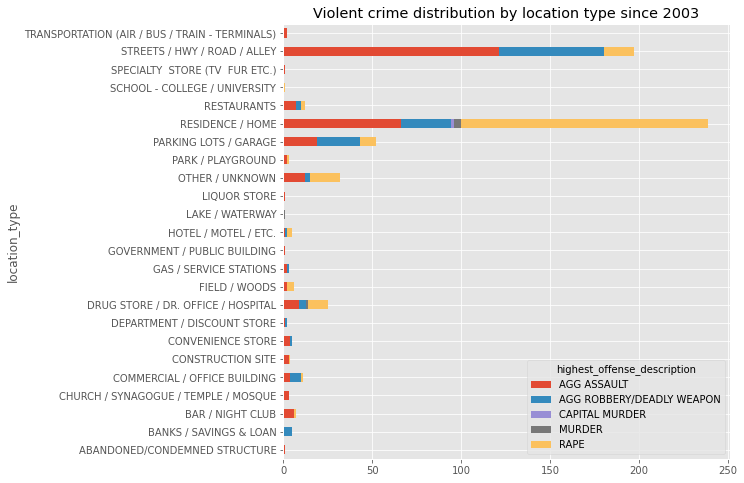

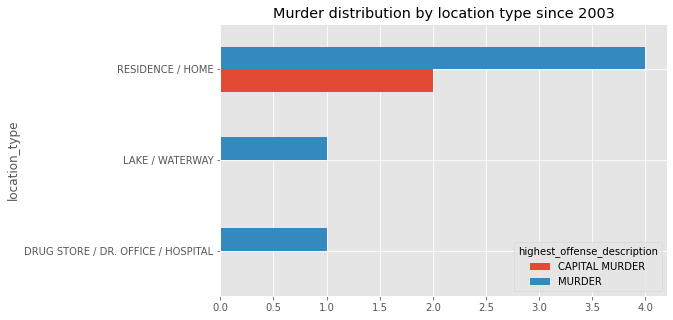

In [8]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.barh(
    figsize=(8, 8),
    title="Violent crime distribution by location type since 2003",
    stacked=True,
)
plt.show()

mur_loc.plot.barh(
    figsize=(8, 5), title="Murder distribution by location type since 2003"
)
plt.show()

In [9]:
# Show addresses with 5 or more reported violent crimes
display(df_viol.address.value_counts().head(8))

# Show addresses where murders occurred
display(df_viol_mur.address.value_counts())

900 BLOCK E 32ND ST          54
919 E 32ND ST                37
2510 LEON ST                  8
600 W 26TH ST                 7
600 BLOCK W 26TH ST           7
1200 BLOCK W 38TH ST          6
2400 BLOCK SAN GABRIEL ST     6
500 BLOCK W 22ND ST           5
Name: address, dtype: int64

904 W 21ST ST          1
W 30TH ST / EAST DR    1
2529 RIO GRANDE ST     1
900 E 30TH ST          1
3102 1/2 KING ST       1
510 W 26TH ST          1
3303 LIBERTY ST        1
2812 NUECES ST         1
Name: address, dtype: int64

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


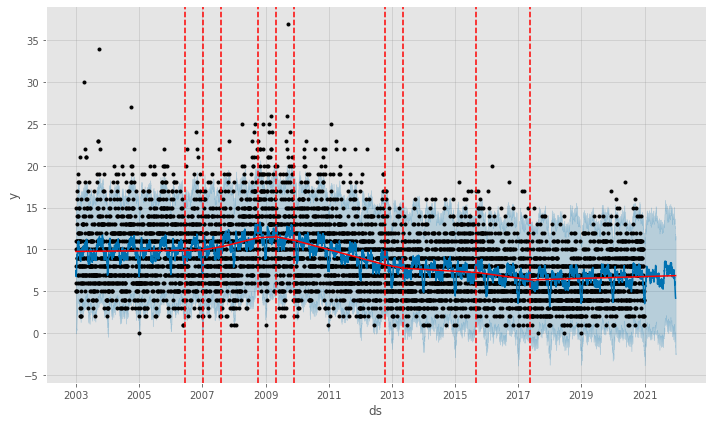

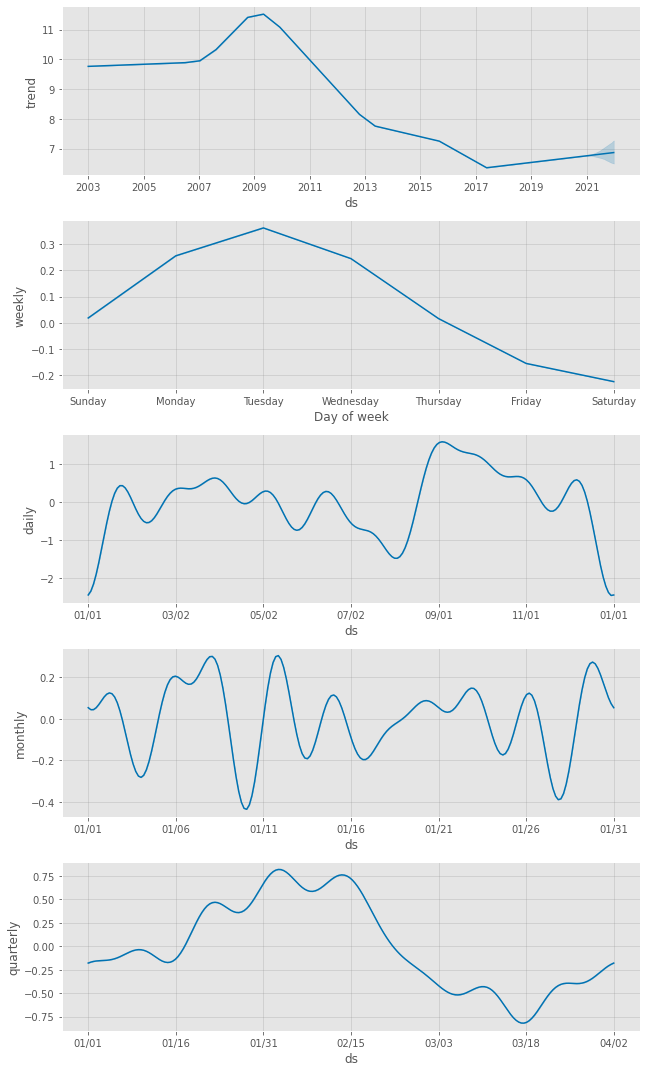

In [10]:
# forecasting for overall crime
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast)
fig2_1 = plot_plotly(m, forecast)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


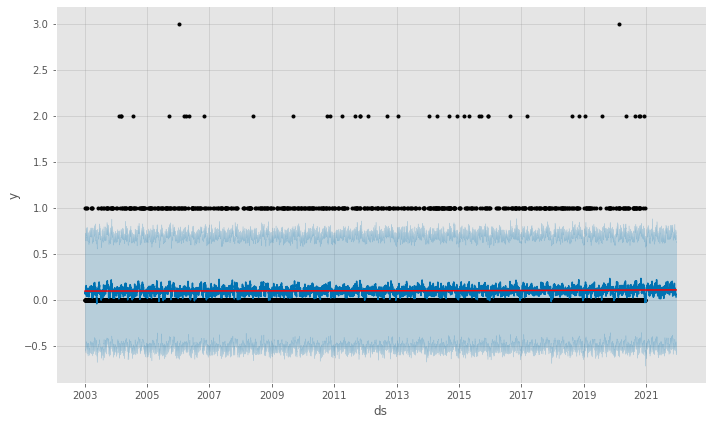

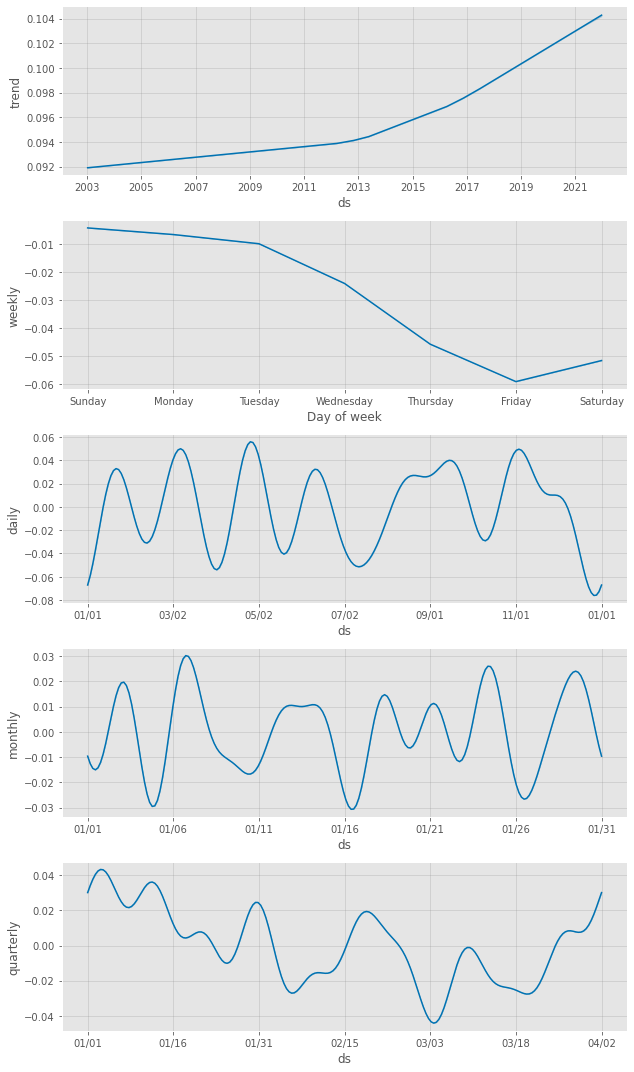

In [11]:
# forecasting for violent crime
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
forecast = n.predict(future)

fig = n.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), n, forecast)

fig3 = n.plot_components(forecast)
fig3_1 = plot_plotly(n, forecast)
fig3_1